In [133]:
import pandas as pd
import numpy as np
from graphviz import Digraph
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams['font.sans-serif']=['Microsoft Yahei']
plt.style.use("ggplot")

<div class="jumbotron">
    <h1 class="display-1">人工神经网络</h1>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

<center><img src="./img/ann/brain.jpg" width=40%></center>

- 人工神经网络是（Artificial Neural Network, ANN）一种模仿生物神经网络学习模式的机器学习模型

- 大脑主要由神经元（neuron）组成

## 神经元的结构

<center><img src="./img/ann/neuron.jpg" width=40%></center>

- 神经元主要由树突（dendrite）、轴突（axon）和轴突末梢（axon terminals）组成
    - 树突：一个神经元具有多个树突，用于接受传入的信息
    - 轴突：一个神经元只有一个轴突，负责传递由该神经元生成的信息
    - 轴突末梢：轴突尾端，与其他神经元的树突连接，传递信息

<center><img src="./img/ann/neuron_flow.jpg" width=40%></center>

- 当细胞体内累积的接收信号**超过**一定的**阈值**后，产生输出信号，通过轴突传递

- 突触（synapse）：神经元的轴突末梢与其他神经元的树突产生连接的连接点

<center><img src="./img/ann/neuron_connect.jpg" width=70%></center>

- 大脑通过在同一个脉冲反复刺激下改变神经元之间的突触的连接强度进行学习

## 感知器

- 感知器（perceptron）：一个包含输入，输出与计算功能的神经元模型

### 感知器图示

<center><img src="./img/ann/perceptron_neuron.png" width=50%></center>

- **输入**相当于神经元的**树突**

- **计算和输出**相当于**轴突**
    + 加权求和相当于神经元中接收信号的累积
    + 非线性变化相当于产生输出信号的阈值函数，被称作**激活函数**

- 输入与输出之间有一条**加权链接**，相当于**突触**

> 链接是神经元中最重要的部分，一个神经网络的训练算法就是不断**调整链接的权重**，以使得整个网络的预测效果最好

### 感知器符号表示

<center><img src="./img/ann/perceptron_symbol.png" width=80%></center>

- 将输入求和函数与非线性变换函数合并到一个圆圈里，代表感知器的内部计算

- 把输入$x$与输出$z$写到连接线的上方，便于绘制复杂的网络

- 一个感知器可以引出多个代表输出的有向箭头，但具有**相同**的值

### 感知器模拟布尔函数

一个数据集由三个布尔变量$(x_1,x_2,x_3)$和一个输出变量$y$。分类规则是
- 当三个输入变量中至少有两个是0，$y=-1$
- 当三个输入变量中至少有两个大于0，$y=1$

In [3]:
perceptionBoolDf = pd.DataFrame([[1,1,1,1,0,0,0,0],
                                [0,0,1,1,0,1,1,0],
                                [0,1,0,1,1,0,1,0],
                                [-1,1,1,1,-1,-1,1,-1]],index=['x1','x2','x3','y']).T
perceptionBoolDf

,x1,x2,x3,y
0,1,0,0,-1
1,1,0,1,1
2,1,1,0,1
3,1,1,1,1
4,0,0,1,-1
5,0,1,0,-1
6,0,1,1,1
7,0,0,0,-1


- 感知器
<center><img src="./img/ann/bool.png" width=60%></center>

感知器输出的计算公式为：
$$
y=\begin{cases}
1, &\text{如果}0.3x_1+0.3x_2+0.3x_3-0.4\times 1>0\\
-1, &\text{如果}0.3x_1+0.3x_2+0.3x_3-0.4\times 1<0
\end{cases}
$$

更一般的情形，
$$
\begin{array}
\hat{y} &=f(w_0\times1+w_1x_1+w_2x_2+\cdots+w_{n-1}x_{n-1}+w_nx_n)\\
&=f(\boldsymbol{w}^T\cdot\boldsymbol{x})
\end{array}
$$
其中，$\boldsymbol{w}=[w_0,w_1,\cdots,w_n]^T$，$\boldsymbol{x}=[1,x_1,x_2,\cdots,x_n]^T$

> $f(\cdot)$即为激活函数

### 激活函数

![](./img/ann/activeFun.svg)

- 符号函数：$y=sign(x)$
$$
y=\begin{cases}
1, &\text{如果}x>0\\
-1, &\text{如果}x\le 0
\end{cases}
$$

- logistic函数
$$
y=\frac{1}{1+e^{-x}}
$$

- 双曲正切函数
$$
y=\frac{e^{2x}-1}{e^{2x}+1}
$$

- 激活函数的目的
    + 把每一层的输入数据限定在一个可比的范围内
    + 非线性激活函数使得人工神经网络几乎可以拟合任意函数

感知器的组成要素：
- 输入
- 权重
- 激活函数
- 输出

### 学习感知器模型

<p class="alert alert-info">感知器模型的学习就是不断调整权重，直到输入和训练样例的实际输出一致</p>

> 权重更新公式

$$
w_j^{(k+1)}=w_j^{(k)}+\lambda(y_i-\hat{y}_i^{(k)})x_{ij}
$$

- $w_j^{(k)}$是第$k$次循环后，第$j$个输入上的权重

- $x_{ij}$是训练样本$\boldsymbol{x}_i$在第$j$个属性上的取值

- $y_i$是训练样本$\boldsymbol{x}_i$的真实值， $\hat{y}_i^{(k)}$是在第$k$次循环后，感知器对训练样本$\boldsymbol{x}_i$的**预测值**
- $y_i-\hat{y}_i^{(k)}$是预测误差

- 如果$y_i=+1$而$\hat{y}_i^{(k)}=-1$，则预测误差为$+2$，那么为了减小该误差，应当<span class="text-danger"><strong>提高</strong></span>所有<span class="text-danger"><strong>正输入</strong></span>链的权重，而<span class="text-success"><strong>降低</strong></span>所有<span class="text-success"><strong>负输入</strong></span>链的权重

- 如果$y_i=-1$而$\hat{y}_i^{(k)}=+1$，则预测误差为$+2$，那么为了减小该误差，应当<span class="text-success"><strong>降低</strong></span>所有<span class="text-success"><strong>正输入</strong></span>链的权重，而<span class="text-danger"><strong>提高</strong></span>所有<span class="text-danger"><strong>负输入</strong></span>链的权重

- $\lambda$是**学习率**（learning rate），值域为$[0,1]$
    + 引入的目的：防止权重更新过大，造成仅仅受到当前对误差调整的影响

## 多层人工神经网络

- 多层人工神经网络由**输入层**、**输出层**、**隐藏层**构成

- 多层神经网络的结构
<center><img src="./img/ann/ann_structure.svg" width=80%></center>

### 输入层

- 输入层的每个神经元与一个属性相连
- 作用是将属性值映射到合理的范围，例如$[-1,1]$

### **隐藏层**（hidden layer)

- 输入层与输出层之间包含的中间层
    + 引入隐藏层使得人工神经网络，相对于简单的感知器，能够处理更加复杂的分类、预测问题

- 隐藏层中的每个神经元通常与输入层的所有神经元相连

- 可以有任意多个隐藏层，但是一般一个隐藏层就可以

- 隐藏层越宽（包含更多的神经元），模式识别的能力越强，但是越容易出现过拟合，因此隐藏层**不应当太宽**

### 输出层

- 输出层的每个神经元与隐藏层的所有神经元相连

- 输出层的作用：将神经网络计算的结果转换为能够理解的结果

- 输出层一般有一个神经元（对应一个计算值），但也可以有多个神经元

### 人工神经网络示例

#### 房地产评估

- 根据房屋的特征，估计房屋的价值

特征|取值范围
---|---
住宅单元数目|整数，$[1,3]$
建造年代|整数，$[1960,2004]$
取暖类型|A或B
总居住面积|浮点数，$[30.00,250.00]$
车库可存车数|整数，$[0,2]$
售价(万)|整数，$[30,1000]$

- 建立的三层神经网络模型（所有数值是虚拟，为了展示）
- 假设有一个隐藏层，包含两个隐藏神经元
<center><img src="./img/ann/house_ann.svg" width=80%></center>

#### 输出层含有多个神经元

<dl class="row">
    <dt class="col-md-1">例：</dt>
    <dd class="col-md-auto">一家百货公司想要预测顾客购买不同部门商品的可能性：服装、家具、电子产品，以便利用这些信息进行促销</dd>
</dl>

<center><img src="./img/ann/store_ann.png" width=70%></center>

- 每个部门对应一个输出，反应从该部门购买的可能性

### 神经网络结构类型

- **前馈**（feed-forward）神经网络、
    + 也被称作多层感知器（Multiple-Layer Perceptron, MLP）
    + 每一层的神经元**仅和下一层**的神经元相连

- **递归**（recurrent）神经网络
    + 也被称作循环神经网络
    + 允许位于同一层的神经元相连
    + 允许下一层的神经元**反向**连接上一层神经元
    + 能够处理序列相关问题

<center><img src="./img/ann/recurrent.png" width=40%></center>

### 权重的求解

<p class="alert alert-danger">ANN学习算法的目标是确定一组权重，最小化误差的平方和</p>

$$
E(\boldsymbol{w}) = \frac{1}{2}\sum_{i=1}^N(y_i-\hat{y}_i)^2
$$

$$
w_j^{(k+1)}=w_j^{(k)}+\lambda(y_i-\hat{y}_i^{(k)})x_{ij}
$$

- **反向传播**（back-propagation）

1. 前向阶段：先计算第$k$层神经元的输出，再计算第$k+1$层神经元的输出

2. 后向阶段：将估计结果与实际结果的差（误差）通过网络反向传播，调整权重，将误差降至最小

## ANN学习的设计问题

### 输入层的神经元数目

- 连续变量对应一个输入神经元

- 二元输入变量对应一个输入神经元

- 分类变量，有$k$个值
    + 每一个分类值对应一个输入神经元， `one-hot`编码

### 输出层的神经元数目

- 二元属性类别，对应一个输出神经元

- $k-$类属性类别，对应$k$个输出神经元

### 隐藏层的数量

- 从1、2、3个神经元开始实验，如果构建的神经网络预测效果不好，逐步增加隐藏层中神经元的数目

- 如果构造神经网络用于**分类**，那么从**一个类别**对应**一个隐藏层的神经元**开始

### 初始化权重与偏离

- 随机赋值

## `sklearn`实现

- 读入数据，titanic生存分类

In [4]:
titDfRaw = pd.read_csv('./data/analysis/train.csv')
titDfRaw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 数据预处理

In [5]:
titDfRaw.set_index('PassengerId',inplace=True)
titDf = titDfRaw.loc[:,['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
titDf.head()
titDf.shape

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


(891, 8)

##### 删除含有缺失值的行

In [6]:
titDf.dropna(axis=0,how='any',inplace=True)
titDf.shape

(712, 8)

##### 划分预测属性与分类属性

In [7]:
titX = titDf.iloc[:,1:]
titX.head()
titY = titDf['Survived']
titY.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

##### 对于分类预测属性进行`one-hot`编码

In [8]:
titXOH = pd.get_dummies(titX,columns=['Sex','Embarked'])
titXOH.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1


### 建立神经网络模型

- 用反向传播算法实现的多层神经网络

```python
from sklearn.neural_network import MLPClassifier
```

```python
MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', learning_rate='constant')
```

- `hidden_layer_sizes`：`tuple`类型，隐藏层设置，元组的元素个数代表隐藏层的数量，每一个元素值代表对应隐藏层中的神经元数量
    + 例如，`(100,50)`表示有2个隐藏层，第一个隐藏层含有100个神经元，第二个隐藏层含有50个神经元

- `activation`：`str`类型，激活函数，可选的类型包括，
    + `identity`：$f(x)=x$
    + `logistic`：$f(x)=\frac{1}{1+e^{-x}}$
    + `tanh`：$f(x)=\frac{e^{2x}-1}{e^{2x}+1}$
    + `relu`：$f(x)=\max(0,x)$，修正线性，默认值

- `solver`：`str`类型，权重优化的算法，可选的值包括，
    + `lbfgs`：对于小规模数据集效果好
    + `adam`：对于大规模数据集（训练集包含的样本数量达到几千或者上万条）效果好，默认值

- `learning_rate`：`str`类型，学习率
    + `constant`：恒定学习率，默认值
    + `invscaling`：逐步降低学习率

In [9]:
from sklearn.neural_network import MLPClassifier

In [10]:
titAnn = MLPClassifier(hidden_layer_sizes=(2,),solver='lbfgs')
titAnn
# 一个隐藏层，包含2个隐藏神经元

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### 训练神经网络模型

#### 划分训练集与检验集

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
titTrainX,titTestX,titTrainY,titTestY = train_test_split(titXOH,titY,test_size=0.3)
titTrainX.shape
titTestX.shape
titTrainY.value_counts()
titTestY.value_counts()

(498, 10)

(214, 10)

0    293
1    205
Name: Survived, dtype: int64

0    131
1     83
Name: Survived, dtype: int64

#### 在训练集上训练模型

In [13]:
titAnn.fit(titTrainX,titTrainY)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### MLPClassifier的属性

- `classes_`：输出的类标签，形状是`[n_classes]`

In [14]:
titAnn.classes_

array([0, 1])

- `coefs_`：`list`类型，第$i$个元素代表从第$i$层到第$i+1$层的权重

In [15]:
titAnn.coefs_

[array([[ 0.1514132 ,  0.56300557],
        [-0.49025021,  0.2223578 ],
        [-0.4406029 , -0.35443398],
        [ 0.02742043, -0.39357288],
        [ 0.36569252,  0.42667204],
        [-0.44396639,  0.24887892],
        [-0.24248153,  0.03401736],
        [ 0.59693477,  0.05229013],
        [-0.30391542,  0.28659835],
        [ 0.2638007 , -0.12595267]]),
 array([[ 0.40892106],
        [-0.61114725]])]

- `n_layers_`：`int`类型，神经网络包含的层数量

In [16]:
titAnn.n_layers_

3

- `n_outputs_`：`int`类型，输出的个数

In [17]:
titAnn.n_outputs_

1

- `out_activation_`：`str`类型，输出神经元的激活函数

In [18]:
titAnn.out_activation_

'logistic'

### 检验神经网络在训练集上的分类性能

In [19]:
from sklearn import metrics

- 对训练集样本的类别预测

In [20]:
titTrainYPre = titAnn.predict(titTrainX)

##### 准确率

In [21]:
print(f'神经网络在训练集上的准确率是{metrics.accuracy_score(titTrainY,titTrainYPre)}')

神经网络在训练集上的准确率是0.5883534136546185


##### 召回率

In [22]:
print(f'神经网络在训练集上对于未生还（类标签是0）的召回率是{metrics.recall_score(titTrainY,titTrainYPre,pos_label=0)}')

神经网络在训练集上对于未生还（类标签是0）的召回率是1.0


In [23]:
print(f'神经网络在训练集上对于生还（类标签是1）的召回率是{metrics.recall_score(titTrainY,titTrainYPre,pos_label=1)}')

神经网络在训练集上对于生还（类标签是1）的召回率是0.0


###### 为什么对于生还的召回率是0?

In [24]:
pd.Series(titTrainYPre).value_counts()

0    498
dtype: int64

- 因为神经网络并没有预测出训练集的样本属于生还类别，表明当前的神经网络模型分类性能较差

##### 精确率

In [25]:
print(f'神经网络在训练集上对于未生还（类标签是0）的精确率是{metrics.precision_score(titTrainY,titTrainYPre,pos_label=0)}')

神经网络在训练集上对于未生还（类标签是0）的精确率是0.5883534136546185


In [26]:
print(f'神经网络在训练集上对于生还（类标签是1）的精确率是{metrics.precision_score(titTrainY,titTrainYPre,pos_label=1)}')

神经网络在训练集上对于生还（类标签是1）的精确率是0.0


/home/VENV36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### F1_score

In [27]:
print(f'神经网络在训练集上对于未生还（类标签是0）的f1_score是{metrics.f1_score(titTrainY,titTrainYPre,pos_label=0)}')

神经网络在训练集上对于未生还（类标签是0）的f1_score是0.7408343868520859


In [28]:
print(f'神经网络在训练集上对于生还（类标签是1）的f1_score是{metrics.f1_score(titTrainY,titTrainYPre,pos_label=1)}')

神经网络在训练集上对于生还（类标签是1）的f1_score是0.0


### 标准化预测属性

<p class="alert alert-danger">在训练之前<strong>标准化预测属性</strong>，对于神经网络建模非常重要</p>

- 让所有预测属性的数值范围可比

In [29]:
from sklearn import preprocessing

In [30]:
preprocessing.scale(titTrainX)

array([[ 0.92809803,  0.43486132, -0.52654352, ..., -0.46966822,
        -0.21498485,  0.53866078],
       [ 0.92809803, -0.38029905,  1.67697473, ..., -0.46966822,
        -0.21498485,  0.53866078],
       [ 0.92809803, -0.51615911, -0.52654352, ...,  2.12916259,
        -0.21498485, -1.85645592],
       ...,
       [ 0.92809803, -0.17650895, -0.52654352, ..., -0.46966822,
        -0.21498485,  0.53866078],
       [-0.25701176, -0.31236902, -0.52654352, ..., -0.46966822,
        -0.21498485,  0.53866078],
       [-1.44212155,  0.8424415 , -0.52654352, ...,  2.12916259,
        -0.21498485, -1.85645592]])

- 虽然可以实现对训练集预测属性的标准化，但是这种标准化规则**不能**轻易应用到检验集上

#### 标准化工具

```python
preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
```

- 在训练集上计算均值和标准差，然后将其应用到检验集上

In [31]:
titScaler = preprocessing.StandardScaler()

In [32]:
titScaler.fit(titTrainX)
titTrainXScale = titScaler.transform(titTrainX)
titTrainXScale

StandardScaler(copy=True, with_mean=True, with_std=True)

array([[ 0.92809803,  0.43486132, -0.52654352, ..., -0.46966822,
        -0.21498485,  0.53866078],
       [ 0.92809803, -0.38029905,  1.67697473, ..., -0.46966822,
        -0.21498485,  0.53866078],
       [ 0.92809803, -0.51615911, -0.52654352, ...,  2.12916259,
        -0.21498485, -1.85645592],
       ...,
       [ 0.92809803, -0.17650895, -0.52654352, ..., -0.46966822,
        -0.21498485,  0.53866078],
       [-0.25701176, -0.31236902, -0.52654352, ..., -0.46966822,
        -0.21498485,  0.53866078],
       [-1.44212155,  0.8424415 , -0.52654352, ...,  2.12916259,
        -0.21498485, -1.85645592]])

简洁的用法

```python
titScaler.fit_transform(titTrainX)
```
- 先训练，然后转变原始数据

### 重新训练神经网络模型

##### 在训练集上训练模型

In [33]:
titAnn.fit(titTrainXScale,titTrainY)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

##### 预测训练集样本类别

In [34]:
titTrainYPreNew = titAnn.predict(titTrainXScale)
pd.Series(titTrainYPreNew).value_counts()

0    296
1    202
dtype: int64

In [35]:
# 训练集上真实类别分布
pd.Series(titTrainY).value_counts()

0    293
1    205
Name: Survived, dtype: int64

##### 神经网络在训练集上的分类性能

In [36]:
print(f'神经网络在训练集上的准确率是{metrics.accuracy_score(titTrainY,titTrainYPreNew)}')

神经网络在训练集上的准确率是0.8373493975903614


In [37]:
print(f'神经网络在训练集上对于未生还（类标签是0）的f1_score是{metrics.f1_score(titTrainY,titTrainYPreNew,pos_label=0)}')

神经网络在训练集上对于未生还（类标签是0）的f1_score是0.8624787775891342


In [59]:
print(f'神经网络在训练集上对于生还（类标签是1）的f1_score是{metrics.f1_score(titTrainY,titTrainYPreNew,pos_label=1)}')

神经网络在训练集上对于生还（类标签是1）的f1_score是0.8009828009828011


### 选择合适的隐藏层设置

#### 增加隐藏层神经元数量的效果

- 利用训练集和检验集的准确率寻找隐藏层的设置

- 标准化检验集的预测属性

In [39]:
titTestXScale = titScaler.transform(titTestX)

- 计算不同的隐藏层神经元数量对应的训练集和检验集的准确率

In [60]:
trainAccuLst = []   # 记录训练集上准确率的列表
testAccuLst = []   # 记录检验集上准确率的列表
for each in range(1,51):
    # 隐藏层包含的神经元数量从1以1为步长增加到50
    tmpAnn = MLPClassifier(hidden_layer_sizes=(each,),solver='lbfgs',activation='relu',learning_rate='constant',max_iter=1000)
    tmpAnn.fit(titTrainXScale,titTrainY)      # 在训练集上训练神经网络
    trainYPre = tmpAnn.predict(titTrainXScale)      # 计算训练集上每个样本的类别
    trainAccuLst.append(metrics.accuracy_score(titTrainY,trainYPre))
    testYPre = tmpAnn.predict(titTestXScale)       # 计算检验集上每个样本的类别
    testAccuLst.append(metrics.accuracy_score(titTestY,testYPre))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(9,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(11,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(12,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(14,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(17,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(18,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(19,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(21,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(22,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(23,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(24,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(25,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(26,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(27,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(28,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(29,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(31,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(32,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(33,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(34,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(35,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(36,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(37,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(38,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(39,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(41,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(42,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(43,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(44,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(45,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(46,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(47,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(48,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(49,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

- 绘制训练集和检验集准确率随隐藏层神经元数量变化的趋势

[Text(0, 0.5, 'accuracy'),
 Text(0.5, 0, '隐藏层神经元数量'),
 Text(0.5, 1.0, '隐藏层神经元数量 v.s. accuracy')]

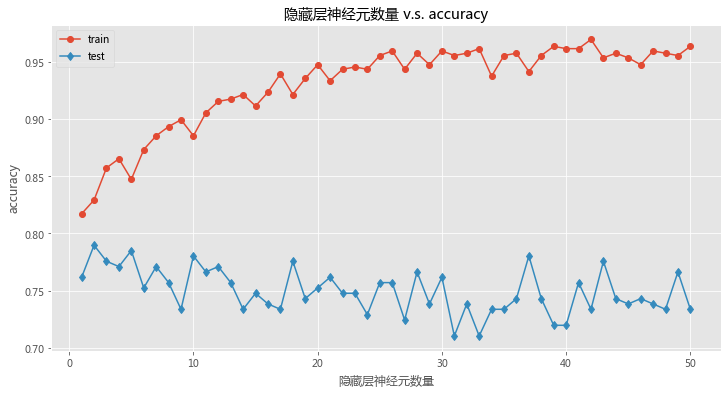

In [61]:
titAnnDf = pd.DataFrame({'hiddenNo':range(1,51),'train':trainAccuLst,'test':testAccuLst})
ax = titAnnDf.plot('hiddenNo','train',kind='line',marker='o',figsize=(12,6))
titAnnDf.plot('hiddenNo','test',kind='line',marker='d',ax=ax)
ax.set(title='隐藏层神经元数量 v.s. accuracy',ylabel='accuracy',xlabel='隐藏层神经元数量')

In [57]:
# 显示准确率在训练集和检验集上均合适的隐藏层数量
titAnnDf.iloc[1,:]

hiddenNo    2.000000
train       0.829317
test        0.799065
Name: 1, dtype: float64

#### 增加隐藏层数量的效果

In [63]:
trainAccuLstNew = []   # 记录训练集上准确率的列表
testAccuLstNew = []   # 记录检验集上准确率的列表
for each in range(1,11):
    # 第二个隐藏层包含的神经元数量从1以1为步长增加到10
    tmpAnn = MLPClassifier(hidden_layer_sizes=(2,each),solver='lbfgs',activation='relu',learning_rate='constant',max_iter=1000)
    tmpAnn.fit(titTrainXScale,titTrainY)      # 在训练集上训练神经网络
    trainYPre = tmpAnn.predict(titTrainXScale)      # 计算训练集上每个样本的类别
    trainAccuLstNew.append(metrics.accuracy_score(titTrainY,trainYPre))
    testYPre = tmpAnn.predict(titTestXScale)       # 计算检验集上每个样本的类别
    testAccuLstNew.append(metrics.accuracy_score(titTestY,testYPre))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 1), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 6), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 7), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 9), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

[Text(0, 0.5, 'accuracy'),
 Text(0.5, 0, '第二个隐藏层神经元数量'),
 Text(0.5, 1.0, '第二个隐藏层神经元数量 v.s. accuracy')]

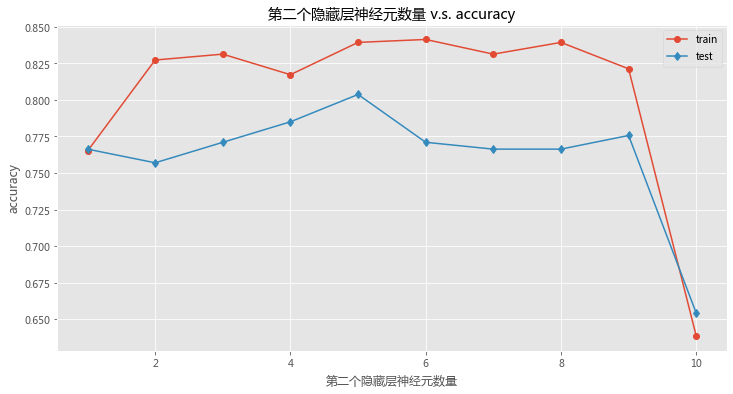

In [64]:
titAnn2HiddenDf = pd.DataFrame({'hiddenNo':range(1,11),'train':trainAccuLstNew,'test':testAccuLstNew})
ax = titAnn2HiddenDf.plot('hiddenNo','train',kind='line',marker='o',figsize=(12,6))
titAnn2HiddenDf.plot('hiddenNo','test',kind='line',marker='d',ax=ax)
ax.set(title='第二个隐藏层神经元数量 v.s. accuracy',ylabel='accuracy',xlabel='第二个隐藏层神经元数量')

In [65]:
titAnn2HiddenDf.iloc[4,:]

hiddenNo    5.000000
train       0.839357
test        0.803738
Name: 4, dtype: float64

#### 经验规则

- 一般1~2个隐藏层，1个隐藏层大多数情况都够用

- 隐藏层中的神经元数量，经验规则有
    + 位于输入层神经元数量与输出层神经元数量之间，例如$\sqrt{m\times n}$，$m,n$分别为输入层和输出层的神经元数量
    + 输入层神经元数量的2/3，如果效果不好，再加上输出层神经元数量
    + 应当小于输入层神经元数量的2倍

- 更好的方法是利用交叉验证（cross-validation）搜索最佳的隐藏层数量和包含的隐藏神经元数量

## 模型选择

### 基本原理

<dl class="row alert-info">
    <dt class="col-md-4">保持方法（holdout）</dt>
    <dd class="col-md-8">将原始数据划分成训练集与检验集，利用检验集评估分类模型的性能</dd>
</dl>

- 不足：
    + 建立的分类模型性能依赖于训练集与检验集的划分与构成
    + 在调整模型参数选择最优模型的时候，检验集会被重复多次使用，使得检验集也慢慢变成了训练集，易于导致**过拟合**

<dl class="row alert-success">
    <dt class="col-md-4">保持交叉验证（holdout cross-validation）</dt>
    <dd class="col-md-8">将原始数据划分成训练集、验证集（validation set）、检验集，利用验证集筛选模型，利用检验集评估最终模型的性能</dd>
</dl>

<center><img src="./img/ann/holdout.jpg" width=60%></center>

- 优势：
    + 解决在模型参数选择过程中，检验集重复多次使用导致过拟合的问题

- 不足：
    + 建立的分类模型的性能对于如何将完整的训练集划分成训练子集和验证子集非常敏感

<dl class="row alert-danger">
    <dt class="col-md-4">$k$折交叉验证（$k$-fold cross-validation）</dt>
    <dd class="col-md-8">训练集的每条记录用于训练的次数相同，并且恰好被检验一次</dd>
</dl>

<center><img src="./img/classification/grid_search_cross_validation.jpg" width=80%></center>

### 利用$k$折交叉验证筛选模型参数

<center><img src="./img/ann/kfold.png" width=60%></center>

- 步骤
    + 原始数据划分成训练集（完整训练集）与检验集
    + 将训练集划分成$k$折
    + 设定模型参数，进行$k$折交叉验证
    + 将获得的最优参数在**完整训练集**上重新训练
    + 在**检验集**上进行模型性能的最终评估

### `sklearn`中的实现

```python
from sklearn.model_selection import cross_val_score
```

```python
cross_val_score(estimator, X, y=None, scoring=None, cv=None)
```

- `estimator`：构建的分类模型

- `X`：训练集的预测属性
- `y`：训练集的类别标签

- `cv`：$k$折的$k$值，`int`类型，表示具体的折数，默认是5折

- `scoring`：性能指标，可选的值包括（`str`类型）
    + 'accuracy'：`metrics.accuracy_score`
    + 'recall'：`metrics.recall_score`
    + 'precision'：`metrics.precision_score`
    + 'f1'：`metrics.f1_score`

- 返回值：每一次交叉验证的性能，是一个含有$k$个值的`Numpy`数组

## 重新建立titanic的神经网络模型

### $k$折验证流程

##### 建立神经网络模型

In [79]:
titAnnNew = MLPClassifier(hidden_layer_sizes=(2,),solver='lbfgs',activation='relu',learning_rate='constant',max_iter=1000)

##### 进行$k$折交叉验证

In [77]:
from sklearn.model_selection import cross_val_score

In [112]:
scoreLst = cross_val_score(titAnnNew,titTrainXScale,titTrainY,scoring='accuracy',cv=10)  # 计算准确率，分成10折
scoreLst

array([0.72      , 0.82      , 0.92      , 0.82      , 0.8       ,
       0.82      , 0.84      , 0.86      , 0.83673469, 0.75510204])

##### 计算准确率的均值和标准差

In [113]:
print(f'10折交叉验证的准确率的均值是{scoreLst.mean():.3f}，标准差是{scoreLst.std():.3f}')

10折交叉验证的准确率的均值是0.819，标准差是0.052


### 筛选模型参数

##### 选择最优参数

In [122]:
hiddenNodes = range(1,21)
accuMeanLst = []
accuStdLst = []
for each in hiddenNodes:
    annTmp = MLPClassifier(hidden_layer_sizes=(each,),solver='lbfgs',activation='relu',learning_rate='invscaling',max_iter=2000)
    resTmp = cross_val_score(annTmp,titTrainXScale,titTrainY,cv=10)
    accuMeanLst.append(resTmp.mean())
    accuStdLst.append(resTmp.std())

/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/VENV36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATION

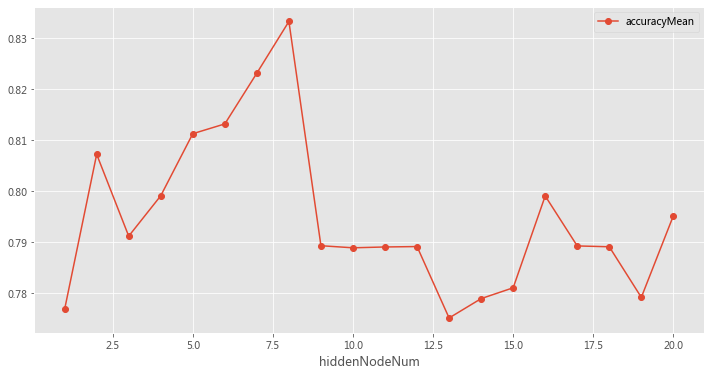

In [123]:
compDf = pd.DataFrame({'hiddenNodeNum':hiddenNodes,'accuracyMean':accuMeanLst,'accuracyStd':accuStdLst})
compDf.plot(x='hiddenNodeNum',y='accuracyMean',kind='line',marker='o',figsize=(12,6))

- 隐藏层含有8个神经元效果最好

##### 在完整训练集上重新训练模型

In [126]:
titAnnNew2 = MLPClassifier(hidden_layer_sizes=(8,),solver='lbfgs',activation='relu',learning_rate='invscaling',max_iter=2000)
titAnnNew2.fit(titTrainXScale,titTrainY)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8,), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

##### 在检验集上检验模型分类效果

In [128]:
titTestYPreNew = titAnnNew2.predict(titTestXScale)

In [129]:
print(f'训练的神经网络模型的准确率是{metrics.accuracy_score(titTestY,titTestYPreNew)}')

训练的神经网络模型的准确率是0.7616822429906542


In [130]:
print(f'训练的神经网络模型关于未生还的f1_score是{metrics.f1_score(titTestY,titTestYPreNew,pos_label=0)}')

训练的神经网络模型关于未生还的f1_score是0.8089887640449439


In [131]:
print(f'训练的神经网络模型关于生还的f1_score是{metrics.f1_score(titTestY,titTestYPreNew,pos_label=1)}')

训练的神经网络模型关于生还的f1_score是0.6832298136645963
